C:\Users\HG\AppData\Local\Temp\ipykernel_26388\79601782.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_book = order_book.append({'price': 100, 'quantity': 10, 'type': 'buy'}, ignore_index=True)
C:\Users\HG\AppData\Local\Temp\ipykernel_26388\79601782.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_book = order_book.append({'price': 101, 'quantity': 5, 'type': 'sell'}, ignore_index=True)
C:\Users\HG\AppData\Local\Temp\ipykernel_26388\79601782.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_book = order_book.append({'price': 99, 'quantity': 8, 'type': 'buy'}, ignore_index=True)
C:\Users\HG\AppData\Local\Temp\ipykernel_26388\79601782.py:9: FutureWarning: The frame.append method is deprecated and w

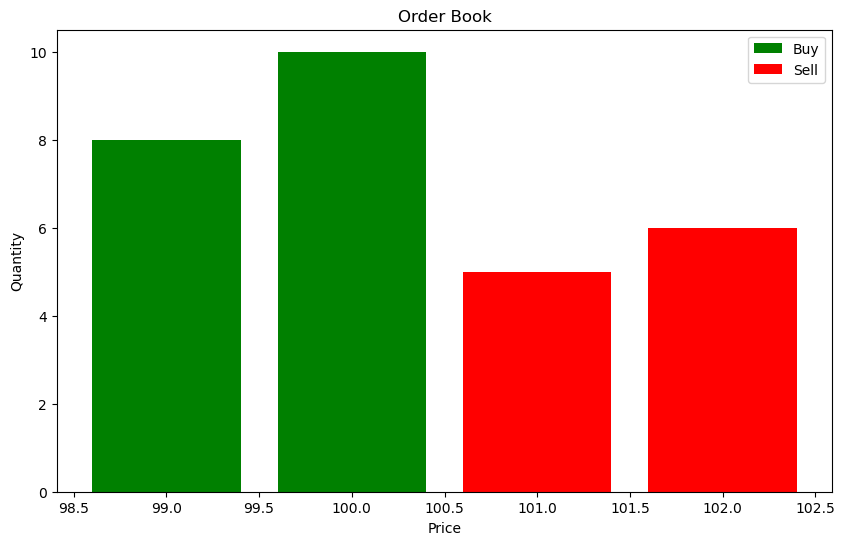

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 创建一个空的订单簿
order_book = pd.DataFrame(columns=['price', 'quantity', 'type'])
# 添加一些买单和卖单
order_book = order_book.append({'price': 100, 'quantity': 10, 'type': 'buy'}, ignore_index=True)
order_book = order_book.append({'price': 101, 'quantity': 5, 'type': 'sell'}, ignore_index=True)
order_book = order_book.append({'price': 99, 'quantity': 8, 'type': 'buy'}, ignore_index=True)
order_book = order_book.append({'price': 102, 'quantity': 6, 'type': 'sell'}, ignore_index=True)
# 对订单簿进行排序
order_book = order_book.sort_values(by='price', ascending=False)
# 创建一个新的图形
plt.figure(figsize=(10,6))
# 画出买单和卖单
plt.bar(order_book[order_book['type'] == 'buy']['price'], order_book[order_book['type'] == 'buy']['quantity'], color='green')
plt.bar(order_book[order_book['type'] == 'sell']['price'], order_book[order_book['type'] == 'sell']['quantity'], color='red')
# 设置图形的标题和标签
plt.title('Order Book')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend(['Buy', 'Sell'])
# 显示图形
plt.show()

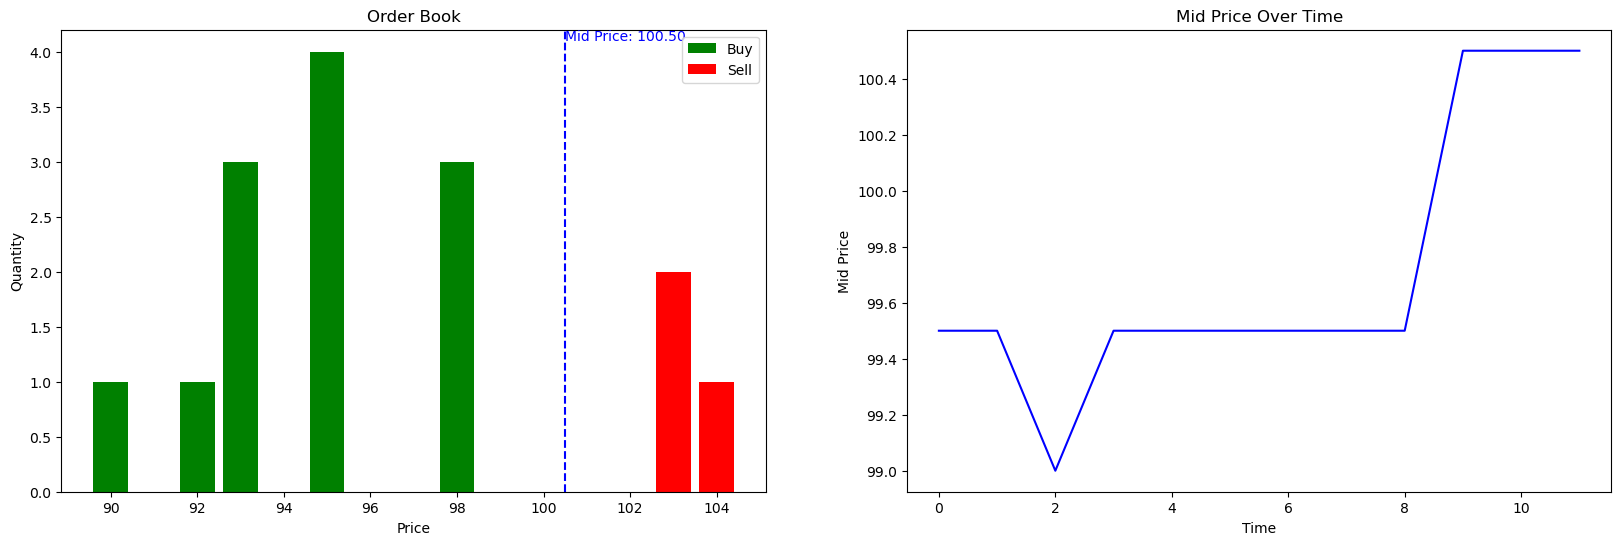

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numpy as np
# 创建一个空的订单簿
order_book = pd.DataFrame({'price': np.arange(90, 110), 'quantity': np.random.randint(1, 10, 20), 'type': ['buy']*10 + ['sell']*10})
# 对订单簿进行排序
order_book = order_book.sort_values(by='price', ascending=False)
# 创建一个新的图形，大小为20x6，子图在一行上
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# 存储mid price的历史值
mid_prices = []
# 定义一个更新图形的函数
def update(num):
    axs[0].clear()
    axs[1].clear()
    axs[0].bar(order_book[order_book['type'] == 'buy']['price'], order_book[order_book['type'] == 'buy']['quantity'], color='green')
    axs[0].bar(order_book[order_book['type'] == 'sell']['price'], order_book[order_book['type'] == 'sell']['quantity'], color='red')
    axs[0].set_title('Order Book')
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Quantity')
    axs[0].legend(['Buy', 'Sell'])
    # 模拟市场订单
    if num % 2 == 0:  # 每两秒一个市场买单
        order_book.loc[order_book['type'] == 'sell', 'quantity'] -= 1
    else:  # 每两秒一个市场卖单
        order_book.loc[order_book['type'] == 'buy', 'quantity'] -= 1
    # 移除数量为0的订单
    order_book.drop(order_book[order_book['quantity'] <= 0].index, inplace=True)
    # 计算mid price
    bid = order_book[order_book['type'] == 'buy']['price'].max()
    ask = order_book[order_book['type'] == 'sell']['price'].min()
    mid_price = (bid + ask) / 2
    # 添加mid price到图中
    axs[0].axvline(mid_price, color='blue', linestyle='--')
    axs[0].text(mid_price, axs[0].get_ylim()[1], 'Mid Price: {:.2f}'.format(mid_price), color='blue', va='top')
    # 更新mid price的历史值，并画出动态图
    mid_prices.append(mid_price)
    axs[1].plot(mid_prices, color='blue')
    axs[1].set_title('Mid Price Over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Mid Price')
# 创建一个动画
ani = animation.FuncAnimation(fig, update, frames=range(10))
# 保存动画为GIF
ani.save('order_book.gif', writer=PillowWriter(fps=1))

C:\Users\HG\AppData\Local\Temp\ipykernel_26388\2027567581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_book['price'] = np.clip(order_book['price'], 90, 110)
C:\Users\HG\AppData\Local\Temp\ipykernel_26388\2027567581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_book['price'] = np.clip(order_book['price'], 90, 110)
C:\Users\HG\AppData\Local\Temp\ipykernel_26388\2027567581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

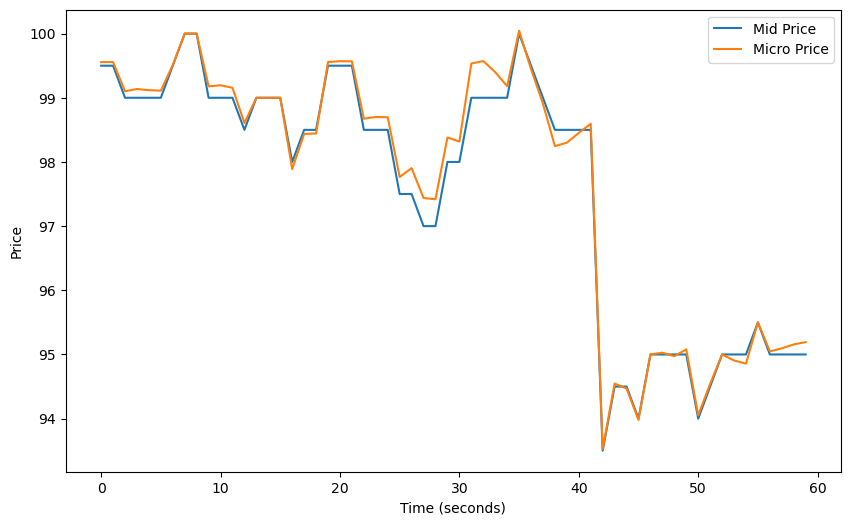

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 定义一个函数来更新订单簿
def update_order_book(order_book):
    # 随机选择一些订单来修改它们的价格和数量
    indices = np.random.choice(order_book.index, size=5)
    order_book.loc[indices, 'price'] += np.random.randint(-2, 3, size=5)
    order_book.loc[indices, 'quantity'] += np.random.randint(-2, 3, size=5)  
    # 删除数量小于等于0的订单
    order_book = order_book[order_book['quantity'] > 0]  
    # 确保价格在一定的范围内
    order_book['price'] = np.clip(order_book['price'], 90, 110)    
    return order_book
# 生成初始的订单簿
order_book = pd.DataFrame({
    'price': np.concatenate([np.arange(90, 100), np.arange(100, 110)]),
    'quantity': np.random.randint(1, 10, 20),
    'type': ['buy']*10 + ['sell']*10
})
# 创建空列表用于存储每一秒的Mid Price和Micro Price
mid_prices = []
micro_prices = []
# 对于每一秒
for _ in range(60):
    # 更新订单簿
    order_book = update_order_book(order_book)
    # 计算Mid Price和Micro Price
    bid = order_book[order_book['type'] == 'buy']['price'].max()
    ask = order_book[order_book['type'] == 'sell']['price'].min()
    mid_price = (bid + ask) / 2
    bid_volume = order_book.loc[order_book['type'] == 'buy', 'quantity'].sum()
    ask_volume = order_book.loc[order_book['type'] == 'sell', 'quantity'].sum()
    micro_price = (bid * ask_volume + ask * bid_volume) / (bid_volume + ask_volume)
    # 添加到列表中
    mid_prices.append(mid_price)
    micro_prices.append(micro_price)
# 可视化价格
plt.figure(figsize=(10, 6))
plt.plot(mid_prices, label='Mid Price')
plt.plot(micro_prices, label='Micro Price')
plt.xlabel('Time (seconds)')
plt.ylabel('Price')
plt.legend()
plt.show()

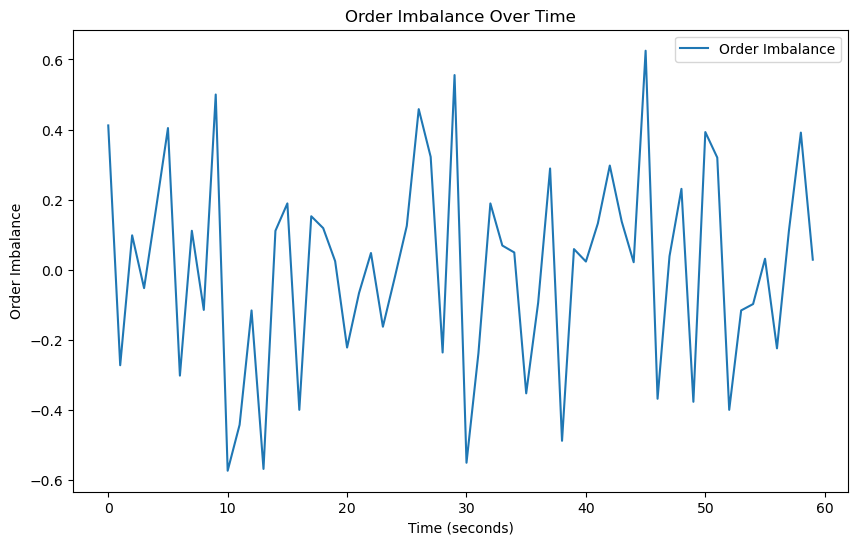

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
# 创建一个包含60个订单簿的列表，每个订单簿代表每秒的订单数据
order_books = [pd.DataFrame({
    'type': np.random.choice(['buy', 'sell'], p=[0.5, 0.5], size=10), 
    'quantity': np.random.randint(1, 10, 10)
}) for _ in range(60)]
# 计算每秒的订单失衡并保存在列表中
order_imbalances = []
for order_book in order_books:
    buy_quantity = order_book[order_book['type'] == 'buy']['quantity'].sum()
    sell_quantity = order_book[order_book['type'] == 'sell']['quantity'].sum()
    order_imbalance = (buy_quantity - sell_quantity) / (buy_quantity + sell_quantity)
    order_imbalances.append(order_imbalance)
    time.sleep(1)  # 等待一秒，模拟实际情况
# 创建一个包含60秒订单失衡的DataFrame
order_imbalances_df = pd.DataFrame(order_imbalances, columns=['Order Imbalance'])
# 绘制订单失衡的图形
order_imbalances_df.plot(figsize=(10, 6))
plt.title('Order Imbalance Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Order Imbalance')
plt.show()